In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
X_train = np.loadtxt("input.csv" ,delimiter=',')
Y_train = np.loadtxt("labels.csv", delimiter=',')
X_test = np.loadtxt("input_test.csv" ,delimiter=',')
Y_test = np.loadtxt("labels_test.csv", delimiter=',')

FileNotFoundError: input.csv not found.

In [20]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)
X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)


(2000, 100, 100, 3)

In [7]:
X_train = X_train/255.0
X_test = X_test/255.0

In [8]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


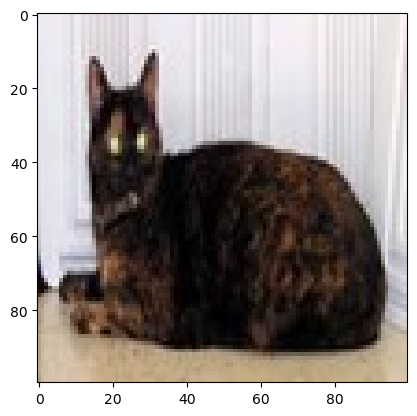

In [16]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [10]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])


/home/student/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-07 10:50:58.957035: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [11]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [12]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [13]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

2025-08-07 10:51:56.854019: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 240000000 exceeds 10% of free system memory.


Epoch 1/5


2025-08-07 10:52:16.385567: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 78675968 exceeds 10% of free system memory.
2025-08-07 10:52:17.243819: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 78675968 exceeds 10% of free system memory.


 1/32 ━━━━━━━━━━━━━━━━━━━━ 2:24 5s/step - accuracy: 0.4062 - loss: 0.7042

2025-08-07 10:52:17.763669: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 78675968 exceeds 10% of free system memory.
2025-08-07 10:52:18.328839: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 78675968 exceeds 10% of free system memory.


32/32 ━━━━━━━━━━━━━━━━━━━━ 33s 917ms/step - accuracy: 0.4990 - loss: 0.7374
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 35s 731ms/step - accuracy: 0.5458 - loss: 0.6825
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 46s 904ms/step - accuracy: 0.6668 - loss: 0.6299
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 874ms/step - accuracy: 0.7077 - loss: 0.5619
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.7775 - loss: 0.4855


In [17]:
model.evaluate(X_test, Y_test)


13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 219ms/step - accuracy: 0.6001 - loss: 0.7196


[0.6064347624778748, 0.6924999952316284]

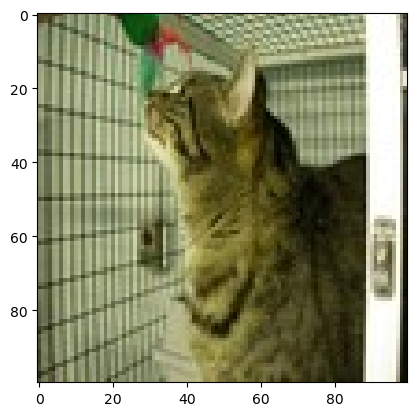

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
Our model says it is a : cat


In [18]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)